Softmax Probabilities: [0.65900114 0.24243297 0.09856589]
Jacobian Matrix:
 [[ 0.22471864 -0.1597636  -0.06495503]
 [-0.1597636   0.18365923 -0.02389562]
 [-0.06495503 -0.02389562  0.08885066]]


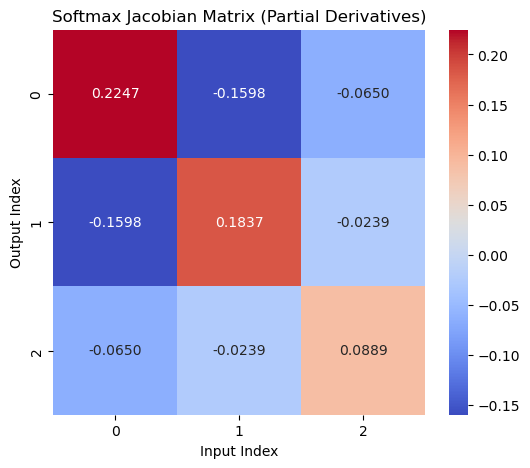

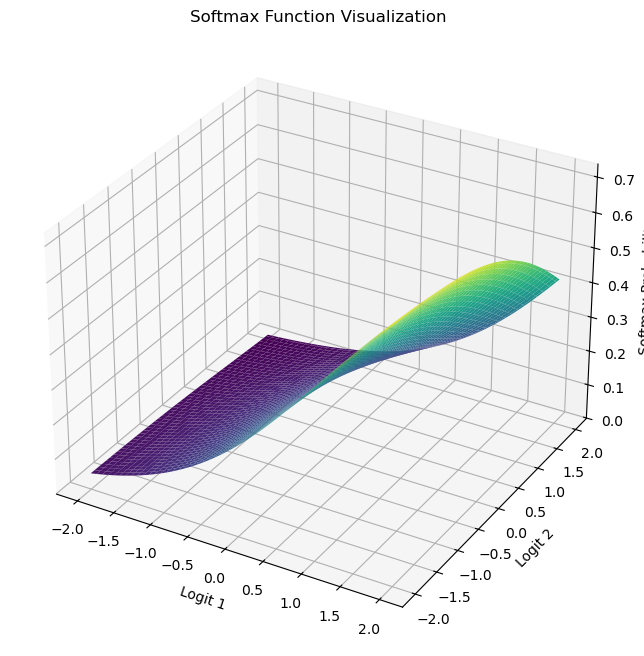

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def softmax(x):
    """Compute softmax values for a given input array."""
    exp_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exp_x / np.sum(exp_x)

def softmax_jacobian(x):
    """Compute the Jacobian matrix of the softmax function."""
    s = softmax(x).reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, s.T)

# Define input scores (logits)
x = np.array([2.0, 1.0, 0.1])  # Example logits
softmax_vals = softmax(x)
jacobian_matrix = softmax_jacobian(x)

# Print results
print("Softmax Probabilities:", softmax_vals)
print("Jacobian Matrix:\n", jacobian_matrix)

# Visualization: Heatmap of Jacobian Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(jacobian_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Softmax Jacobian Matrix (Partial Derivatives)")
plt.xlabel("Input Index")
plt.ylabel("Output Index")
plt.show()

# 3D Surface Plot of Softmax Function
x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.array([softmax([x, y, 1])[0] for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel("Logit 1")
ax.set_ylabel("Logit 2")
ax.set_zlabel("Softmax Probability")
ax.set_title("Softmax Function Visualization")
plt.show()
